In [4]:
# pip install keras

In [7]:
# pip install tensorflow

In [18]:
%matplotlib inline

In [2]:
# import library
import keras
from keras.datasets import mnist

# Data Exploration

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [4]:
# X_train[0]
X_train[0].shape

(28, 28)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
# X_test[100]

# Data Preparation

In [8]:
# Convert to array - tensorflow calculates in float
X_train = X_train.reshape(60000, 784).astype('float32')
X_test  = X_test.reshape(10000, 784).astype('float32')
# Normalize
X_train /= 255
X_test /= 255

In [9]:
# X_train[100]

In [10]:
X_train[0].shape

(784,)

In [11]:
X_test[100].shape

(784,)

In [12]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [13]:
# perform encoding on lebels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [14]:
y_train[2000]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Model Building

In [28]:
# define NN
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(128,activation = "relu",input_shape=(784,))) # 2 to the power 2,4,...
model.add(Dropout(0.2)) # 20-30 % drop per layer
model.add(Dense(256,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(512,activation = "relu"))
model.add(Dense(10,activation = "softmax"))

C:\Users\sukesh.nerolu\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,218 (1.03 MB)

 Trainable params: 270,218 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# 128(784+1) = 100480
# 258(128+1) = 33024
# no. of nueron in present layer(previous layer neoron +1)
# Total parameters  = 270218 = sum of all params
# weight is float (number in float 32 bit)
# 32 * 270218 = 1.03 mb

In [31]:
# define loss function, optimizer, metric - adam is advanced optimization method
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy" ])

In [32]:
history = model.fit(X_train, y_train, batch_size = 128, epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8084 - loss: 0.6151 - val_accuracy: 0.9572 - val_loss: 0.1368
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9516 - loss: 0.1579 - val_accuracy: 0.9682 - val_loss: 0.1003
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9631 - loss: 0.1197 - val_accuracy: 0.9693 - val_loss: 0.0950
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9692 - loss: 0.0987 - val_accuracy: 0.9759 - val_loss: 0.0813
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9741 - loss: 0.0805 - val_accuracy: 0.9772 - val_loss: 0.0741
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9765 - loss: 0.0734 - val_accuracy: 0.9794 - val_loss: 0.0698
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9780 - loss: 0.0662 - val_accuracy: 0.9753 - val_loss: 0.0863
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9814 - loss: 0.0587 - val_accuracy: 0.

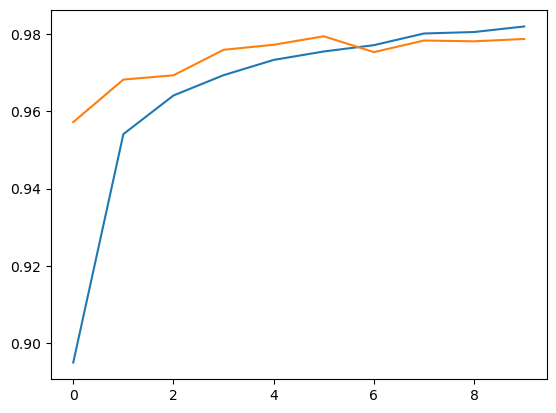

In [33]:
#Vizualize accuracies
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [34]:
model.evaluate(X_test, y_test)
# first part is loss, second part is accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9759 - loss: 0.0869


[0.07475795596837997, 0.9786999821662903]

In [35]:
# predict single value
# model.predict(X_test[10].reshape(1,784)) # run and check values
output = model.predict(X_test[10].reshape(1,784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [36]:
# convert output to class
import numpy as np
np.argmax(output)

0

In [37]:
y_test[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])